## Ejemplo de un sistema gradiente ##

Sea la función $V\in\mathcal{C}^2(\mathbb{R}^2)$ dada por $V(x,y)=x^2(x-1)^2+y^2(y-2)^2$. Entonces el sistema gradiente asociado está dado por 
    \begin{gather*}
        \left\{\begin{array}{l}
            \dot{x}=-2x(x-1)(2x-1)\,,\\
            \dot{y}=-4y(y-2)(y-1)\,.
        \end{array}\right.
    \end{gather*}

In [5]:
# Librerías necesarias: 
from numpy import *  
from scipy import *  
from scipy.integrate import odeint 
import matplotlib.pyplot as plt          
from pylab import * 
from mpl_toolkits import mplot3d
#
rcParams['xtick.direction']  = 'out'
rcParams['ytick.direction']  = 'out'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm']      = 'serif'
rcParams['text.usetex']      = True
rcParams['axes.labelsize']   = 26
rcParams['axes.titlesize']   = 22
rcParams['xtick.labelsize']  = 16
rcParams['ytick.labelsize']  = 16
rcParams['legend.fontsize']  = 18

In [6]:
# Condiciones iniciales y parámetros
t0 = 0
tf = 100
N  = tf
#
# Define intervalo de integración
time = linspace(t0,tf,N*tf)
#
# Define el campo y matriz asociada
def DField(uuu,t):
    x  = uuu[0]
    y  = uuu[1]
    F1 = -2*x*(x-1)*(2*x-1)
    F2 = -2*y*(y-2)*(y-1)
    FG = [F1,F2]
    return FG
#
def V(u,v):
    V = u**2*(u-1)**2 + v**2*(v-2)**2
    return V
#

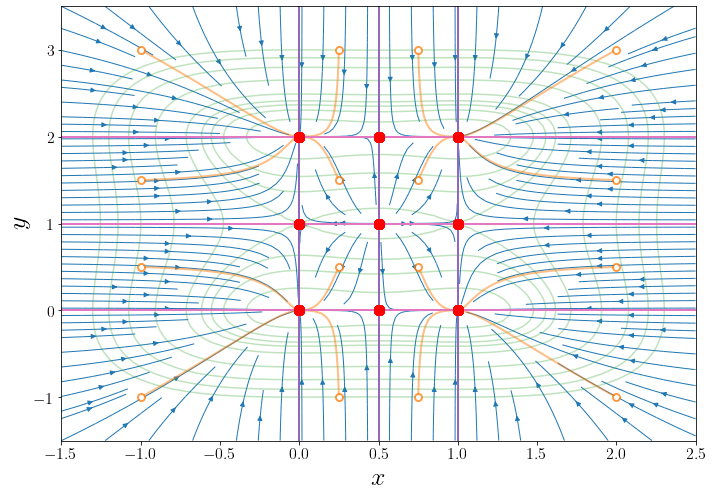

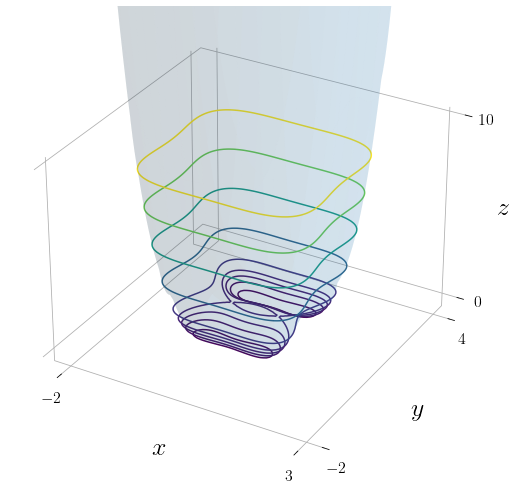

In [8]:
rr = 1
#
if rr == 0:
    %matplotlib qt
else:
    %matplotlib inline
#
fig = plt.figure(0,figsize=(10,7))
#
ax = fig.add_subplot(111)
ax.axvline(x=0,ls='--',lw=1,color='k',alpha=0.5)
ax.axhline(y=0,ls='--',lw=1,color='k',alpha=0.5)
#
# Dibuja un bosquejo del campo de direcciones
YY, XX = np.mgrid[-1.5:3.5:200j, -1.5:2.5:200j]
#
FF = -2*XX*(XX-1)*(2*XX-1)
GG = -2*YY*(YY-2)*(YY-1)
#
ax.streamplot(XX,YY,FF,GG,linewidth=1,density=[1, 2])

xxx      = linspace(-2,3,100)
yyy      = linspace(-2,4,100)
XXX, YYY = meshgrid(xxx,yyy)
#
Z = V(XXX,YYY)
#
levels = [0,0.2,0.5,0.75,1,1.5,3,5,7,9]
ax.contour(XXX,YYY,Z,levels,colors='C2',alpha=0.3)
#
p1 = [0,0.5,1]
p2 = [0,1,2]
#
for ii in range(16):
    # Define condición inicial 
    xi  = [-1,0.25,0.75, 2,  2,  2,2,0.75,0.25,-1, -1,0.25,0.25,0.75,0.75,-1]
    yi  = [-1,-1  ,-1  ,-1,0.5,1.5,3,   3,3   ,3 ,1.5, 0.5, 1.5, 0.5,1.5,0.5]
    XY0 = [xi[ii],yi[ii]]
    #
    z  = odeint(DField,XY0,time)
    xx = z[:,0]
    yy = z[:,1]
    #
    ax.axvline(x=0,ls='-',lw=2,color='C4',alpha=0.5)
    ax.axvline(x=1,ls='-',lw=2,color='C4',alpha=0.5)
    ax.axvline(x=0.5,ls='-',lw=2,color='C4',alpha=0.5)
    ax.axhline(y=0,ls='-',lw=2,color='C6',alpha=0.5)
    ax.axhline(y=2,ls='-',lw=2,color='C6',alpha=0.5)
    ax.axhline(y=1,ls='-',lw=2,color='C6',alpha=0.5)
    #
    ax.plot(xx,yy,lw=2,color='C1',alpha=0.5)
    ax.plot([xx[0]],[yy[0]],'o',color='C1',ms=8,alpha=0.7)
    ax.plot([xx[0]],[yy[0]],'o',color='w',ms=4)
    #
    for kk in range(3):
        ax.plot([p1[0]],[p2[kk]],'o',color='red',ms=10)
        ax.plot([p1[1]],[p2[kk]],'o',color='red',ms=10)
        ax.plot([p1[2]],[p2[kk]],'o',color='red',ms=10)
    #
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
#ax.legend(handletextpad=-0.5,bbox_to_anchor=(0.97, 1),loc='upper left',
#          frameon=False,columnspacing=0.5,markerscale=0.7)
#
xlim(-1.5,2.5)
ylim(-1.5,3.5)
plt.tight_layout()
#
show()
#
fig.savefig('EjSistGrad_PhaseSpace.pdf',dpi=200)
#
#close()
#
fig = plt.figure(1,figsize=(10,7))
#
ax = fig.add_subplot(projection='3d')
#
ax.plot_surface(XXX,YYY,Z, rstride=8, cstride=8, alpha=0.1)
ax.contour3D(XXX,YYY,Z,levels)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');
ax.set_zlim(-0.5,10)
#
# Borrar planos
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#
ax.set_xticks([-2,3])
ax.set_yticks([-2,4])
ax.set_zticks([0,10])
#
plt.tight_layout()
#
show()
#
fig.savefig('EjSistGrad_V.pdf',dpi=200)
#
#close()